In [3]:
import pandas as pd

df = pd.read_csv("./data/5_wsubscribers.csv", names=["user_id", "canonical_id", "subscribers"])

print("Original dataframe length:", len(df))
print("Dropping duplicates length:", len(df.drop_duplicates("canonical_id")))
print("Dropping duplicates length:",len(df.drop_duplicates("canonical_id").dropna(subset=["subscribers"])))
df_filtered = df.drop_duplicates("canonical_id").dropna(subset=["subscribers"])
df_filtered = df_filtered.sort_values("subscribers", ascending=False)
df_filtered.to_csv("./data/6_filtered.csv", index=False)


Original dataframe length: 10686069
Dropping duplicates length: 10607283
Dropping duplicates length: 9902538


In [4]:
df_filtered.head()

,user_id,canonical_id,subscribers
6244579,https://www.youtube.com/user/MrBeast6000,https://www.youtube.com/channel/UCX6OQ3DkcsbYN...,317000000.0
3126291,https://www.youtube.com/user/Tseries,https://www.youtube.com/channel/UCq-Fj5jknLsUf...,274000000.0
9305840,https://www.youtube.com/user/checkgate,https://www.youtube.com/channel/UCbCmjCuTUZos6...,183000000.0
934928,https://www.youtube.com/user/Setindia,https://www.youtube.com/channel/UCpEhnqL0y41Ep...,177000000.0
9676160,https://www.youtube.com/c/KidsDianaShow,https://www.youtube.com/channel/UCk8GzjMOrta8y...,125000000.0


Text(0.5, 0, '#Subscribers')

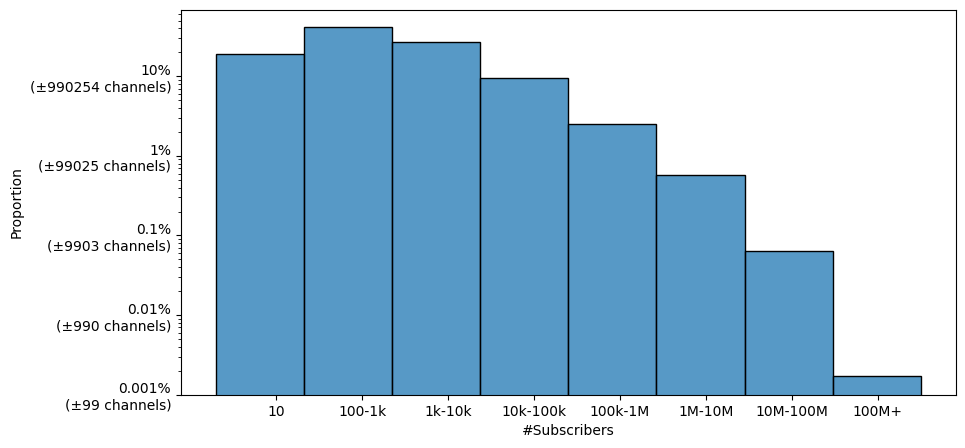

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.subplots(figsize=(10,5))
sns.histplot(np.log10(df_filtered["subscribers"].values), binwidth=1, stat="proportion")
plt.yscale("log")
plt.xticks([1,2,3,4,5,6,7,8], ["10", "100-1k", "1k-10k", "10k-100k", "100k-1M", "1M-10M", "10M-100M", "100M+"])
plt.yticks([0.1, 0.01, 0.001, 0.0001, 0.00001],
           ["10%" + "\n(±{0} channels)".format(round(len(df_filtered)*0.1)), 
             "1%" + "\n(±{0} channels)".format(round(len(df_filtered)*0.01)), 
            "0.1%" + "\n(±{0} channels)".format(round(len(df_filtered)*0.001)), 
            "0.01%" + "\n(±{0} channels)".format(round(len(df_filtered)*0.0001)), 
            "0.001%" + "\n(±{0} channels)".format(round(len(df_filtered)*0.00001))])
plt.xlabel("#Subscribers")